<a href="https://colab.research.google.com/github/Abdelrazek-m/AM_NASA/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [23]:
df=pd.read_csv('assets/advertising.csv')
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [25]:
regression=LinearRegression()
x=df[['TV','Radio','Newspaper']]
y=df['Sales']
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.4,random_state=0)
print(f"train x:{trainx.shape}\ntest x:{testx.shape}\ntrain y:{trainy.shape}\ntest x:{testx.shape}")


train x:(120, 3)
test x:(80, 3)
train y:(120,)
test x:(80, 3)


In [26]:
regression.fit(trainx,trainy)
pr=regression.predict(testx)
dff=pd.DataFrame({'Real':testy,"Predict":pr})
dff.head(10)

,Real,Predict
18,11.3,10.609081
170,8.4,8.569828
107,12.0,9.546186
98,25.4,25.278206
177,16.7,14.812187
182,8.7,8.319999
5,7.2,10.815287
146,18.2,18.411590
12,9.2,10.046917
152,16.6,17.906981


In [27]:
regression.coef_


array([0.05460261, 0.11140366, 0.00609878])

In [28]:
regression.intercept_

4.435197301421219

In [29]:
print(f'Accuracy : {regression.score(testx,testy)*100} %')
print('Mean Absolute Error:', metrics.mean_absolute_error(testy, pr))

Accuracy : 87.65900905155215 %
Mean Absolute Error: 1.299462629952957


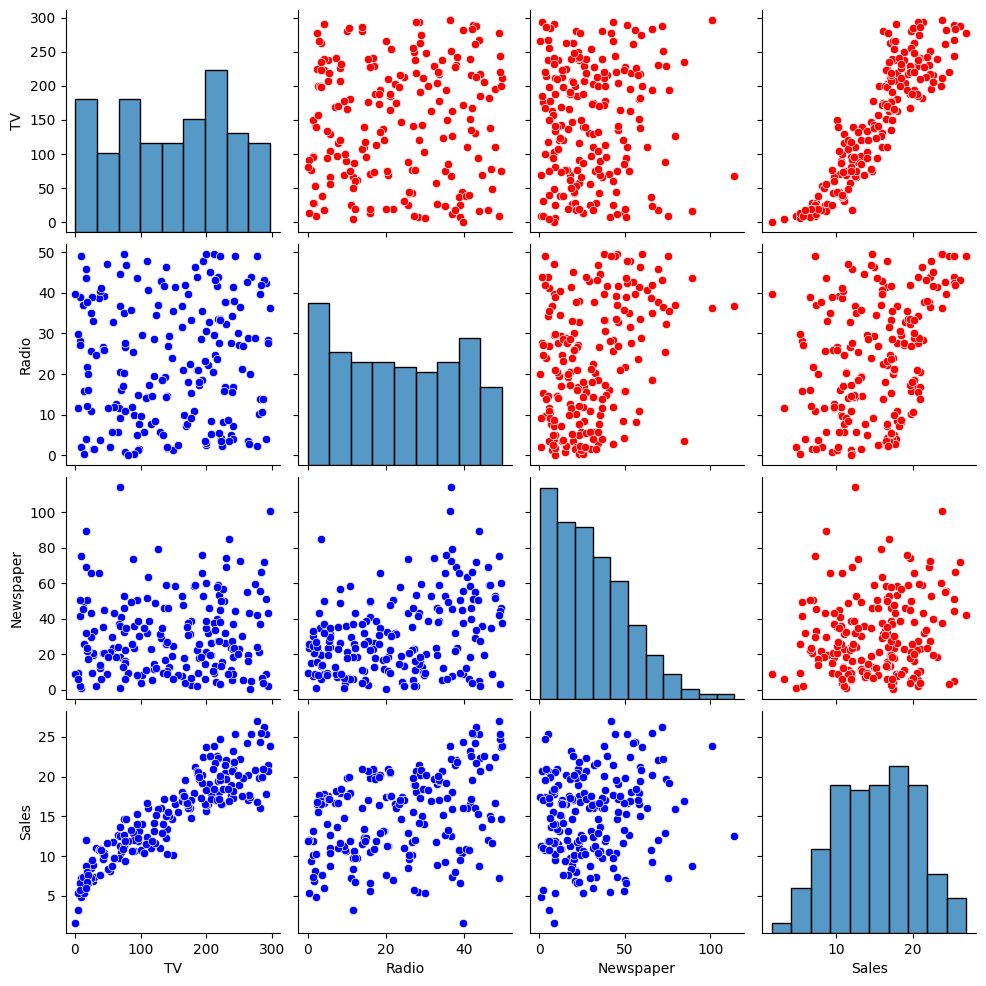

In [30]:
sn=sns.pairplot(df)
sn.map_upper(sns.scatterplot,color="red")
sn.map_lower(sns.scatterplot,color="blue")

<Axes: xlabel='Newspaper', ylabel='Sales'>

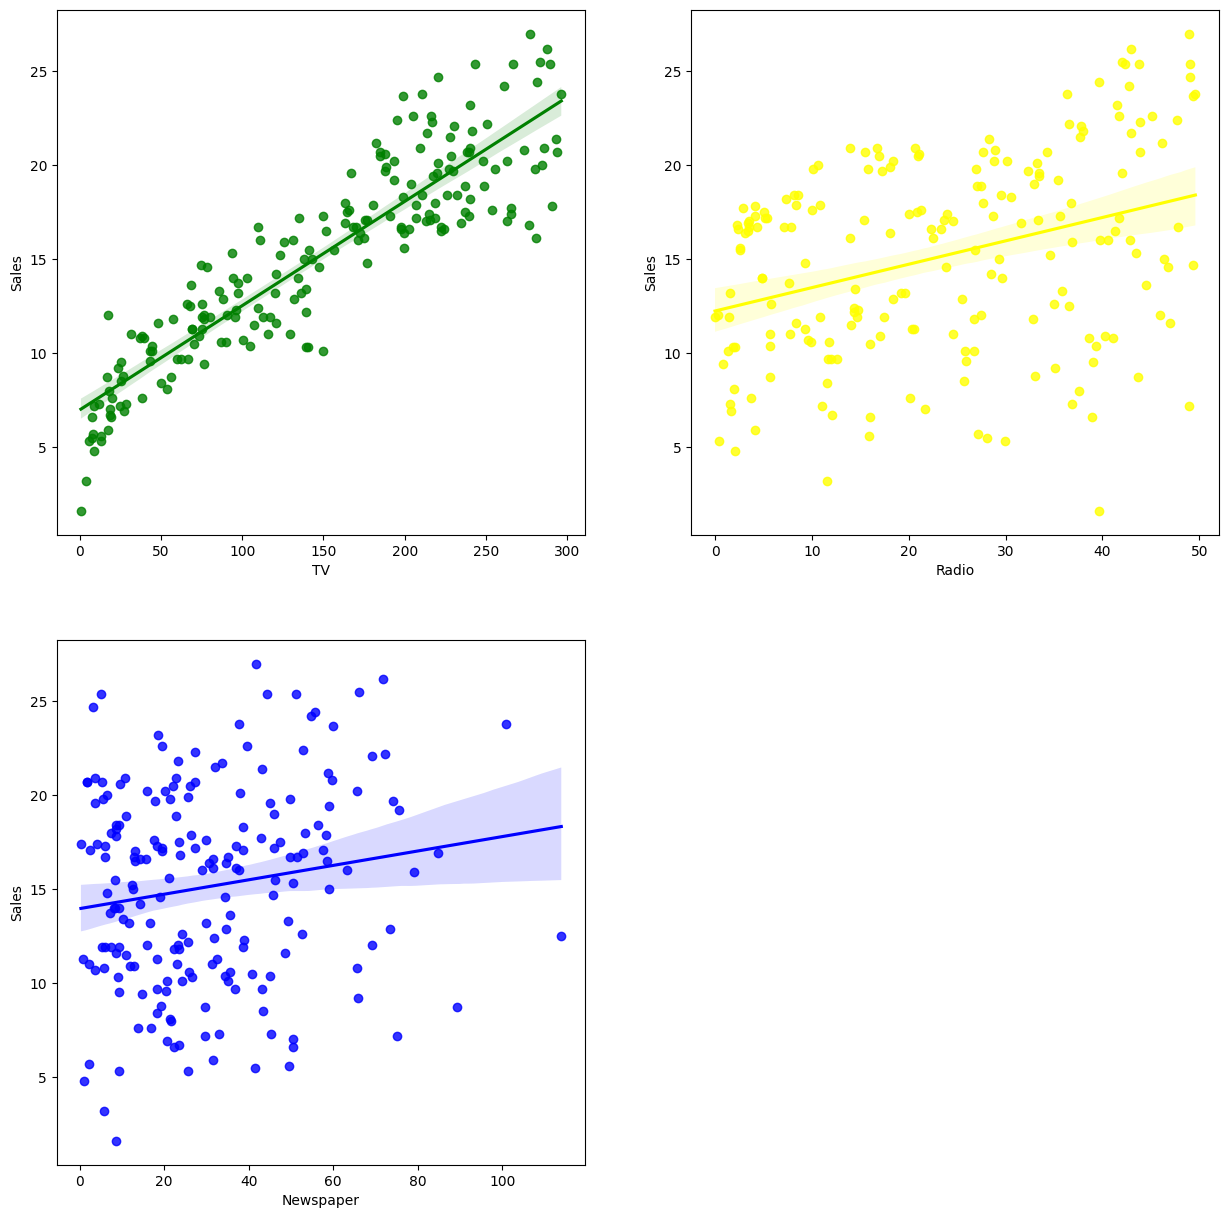

In [35]:
plt.figure(figsize =(15,15))
plt.subplot(2,2,1)
sns.regplot(data=df,x='TV',y='Sales',color='green')
plt.subplot(2,2,2)
sns.regplot(data=df,x='Radio',y='Sales',color='yellow')
plt.subplot(2,2,3)
sns.regplot(data=df,x='Newspaper',y='Sales',color='blue')